##Yoga posture prediction using decision tree,random forest,KNN and CNN

Importing the libraries

In [63]:
import pandas as pd
import numpy as np
import os #it is used to interact with the operating systems
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import cv2
import re #regular expression

In [64]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [65]:

import skimage
from sklearn.metrics import confusion_matrix,f1_score
from tensorflow.keras.models import Sequential, Model

In [66]:
#uploading the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#lisiting the poses
labels=list()
path='/content/drive/MyDrive/yoga_pose_dataset/DATASET/TRAIN'
for i in os.listdir(path):
    labels.append(i)
print(labels)

['plank', 'tree', 'downdog', 'goddess', 'warrior2']


In [ ]:
# Counting the Samples
Total_sample=0
for i in os.listdir(path):
    print(f'Length of :{i}= {len(os.listdir(os.path.join(path,i)))}')
    Total_sample+=len(os.listdir(os.path.join(path,i)))
print(f'Total Samples:{Total_sample}')

Length of :plank= 266
Length of :tree= 160
Length of :downdog= 223
Length of :goddess= 180
Length of :warrior2= 252
Total Samples:1081


In [ ]:
# to find the total number of yoga poses
path = '/content/drive/MyDrive/yoga_pose_dataset/DATASET/TRAIN'
print('Total No of yoga poses in the dataset is:', len(os.listdir(path)))
posses_in_var = os.listdir(path)

Total No of yoga poses in the dataset is: 5


In [ ]:
#image description
images = []
asanas_name = []
images_path = []
images_pixels = []
labels = []
d = {}

i=0
dataset_path = '/content/drive/MyDrive/yoga_pose_dataset/DATASET/TRAIN'

for directory in os.listdir(dataset_path):
    asanas_name.append(directory)
    for img in os.listdir(os.path.join(dataset_path,directory)):
        if len(re.findall('.png',img.lower())) != 0 or len(re.findall('.jpg',img.lower())) != 0 or len(re.findall('.jpeg',img.lower())) != 0:
            img_path = os.path.join(os.path.join(dataset_path,directory),img)
            images.append(img)
            images_path.append(img_path)
            img_pix = cv2.imread(img_path,1)
            images_pixels.append(cv2.resize(img_pix, (100,100)))
            labels.append(i)

    i = i+1

print("Total images: ", len(images))
print("Total images path: ", len(images_path))
print("Total Postures: ", len(asanas_name))
print("Total images_pixels: ", len(images_pixels))

Total images:  1080
Total images path:  1080
Total Postures:  5
Total images_pixels:  1080


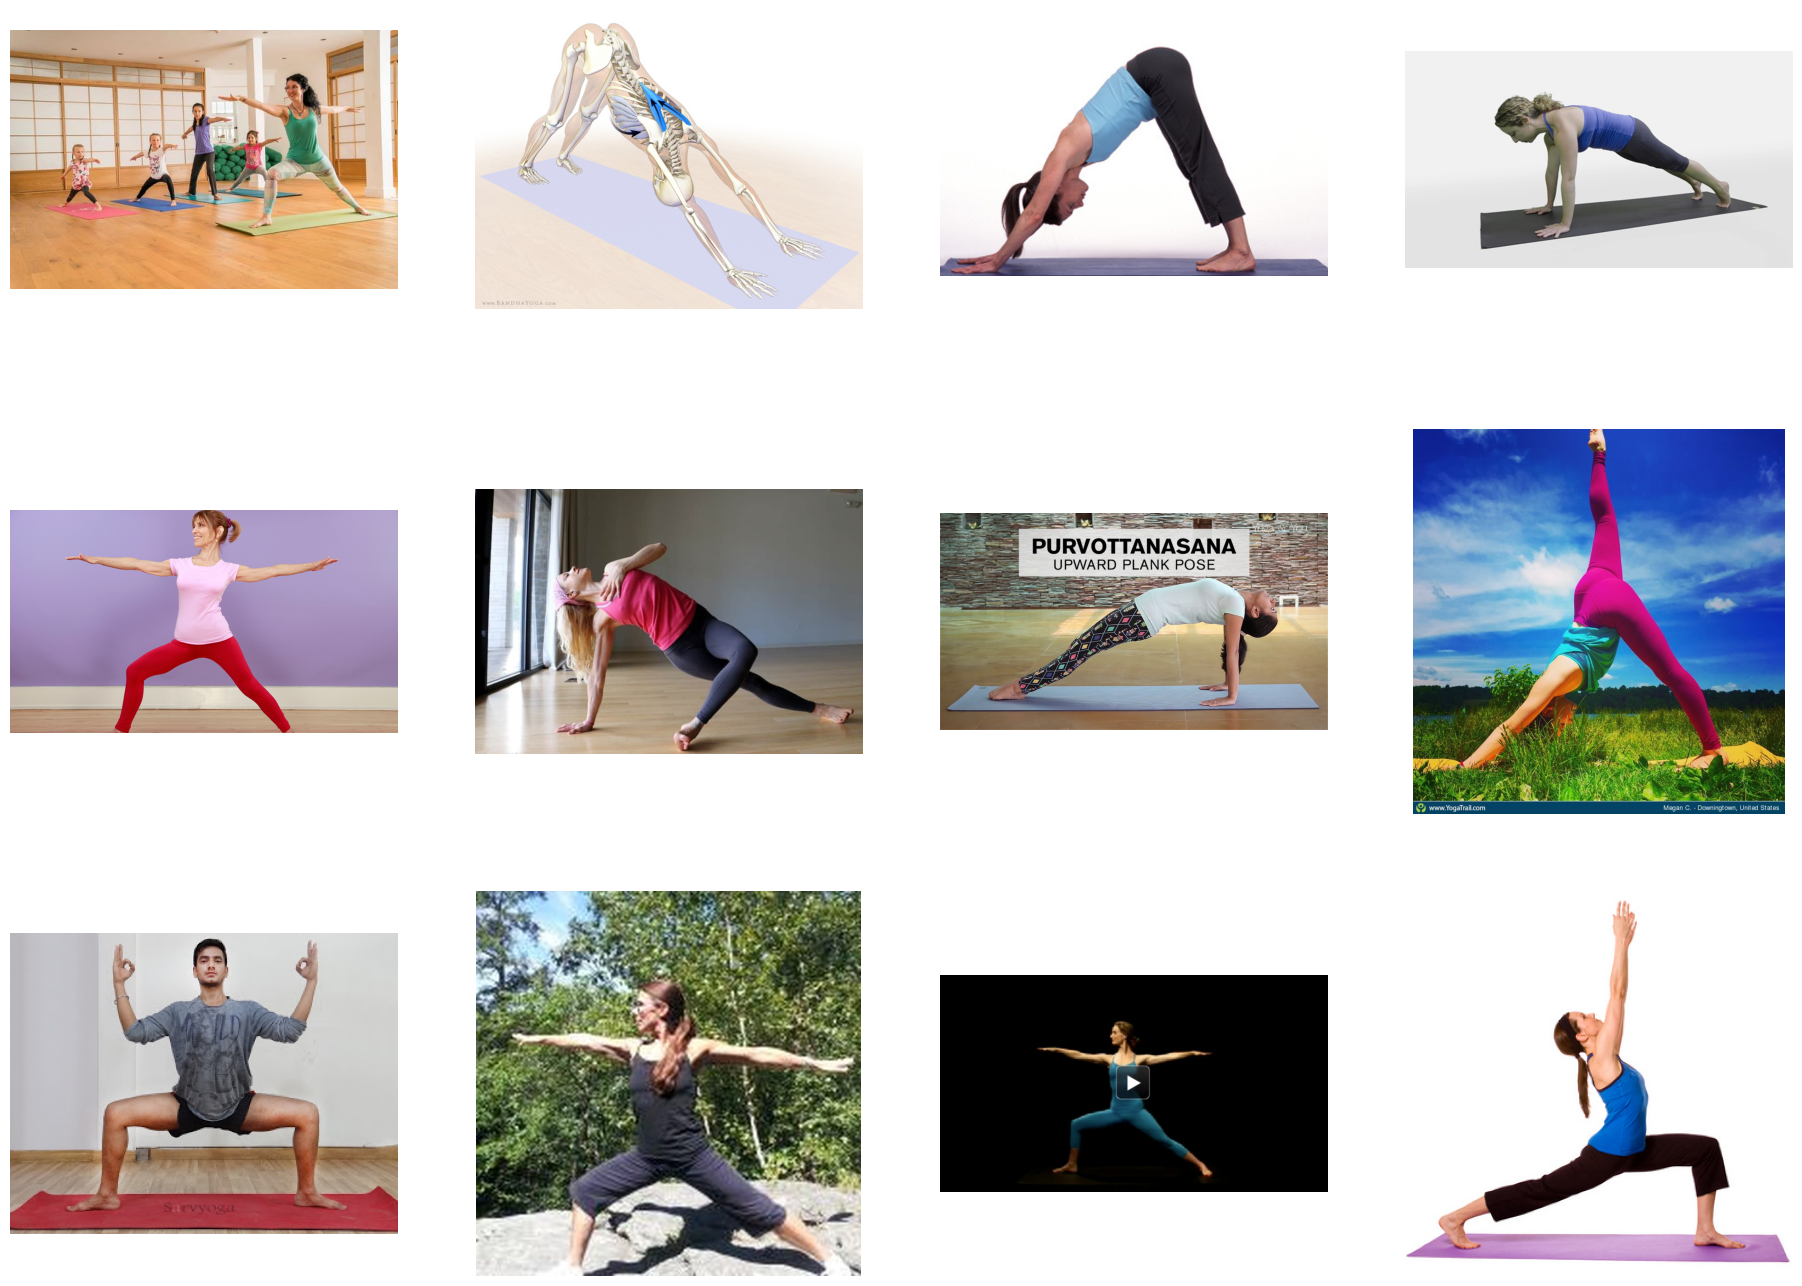

In [ ]:
#displaying the random images
fig = plt.gcf() #get current figure
fig.set_size_inches(23, 23)

next_pix = images_path
random.shuffle(next_pix)

for i, img_path in enumerate(next_pix[0:12]):

    sp = plt.subplot(4, 4, i + 1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [ ]:
shuf = list(zip(images_pixels,labels))
random.shuffle(shuf)

train_data, labels_data = zip(*shuf)

Scaling and Splitting the data into Train and Validation

In [ ]:
X_data = np.array(train_data)/255
Y_data =  to_categorical(labels_data, num_classes = 5)

In [ ]:
#Splitting the Data into Training and Validation.
# 85-15 split.

X_train, X_val, Y_train, Y_val = train_test_split(X_data, Y_data, test_size = 0.15, random_state=50)

print("X train data : ", len(X_train))
print("X label data : ", len(X_val))
print("Y test data : ", len(Y_train))
print("Y label data : ", len(Y_val))

X train data :  918
X label data :  162
Y test data :  918
Y label data :  162


In [ ]:
nsamples, nx, ny, nrgb = X_train.shape
X_train2 = X_train.reshape((nsamples,nx*ny*nrgb))
nsamples, nx, ny, nrgb = X_val.shape
X_test2 = X_val.reshape((nsamples,nx*ny*nrgb))

Model:1 - Decision Tress using Gini(ID3)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='gini',
                             min_samples_split=2,
                             max_features='sqrt')
dtc.fit(X_train2,Y_train)

DecisionTreeClassifier(max_features='sqrt')

In [72]:
y_pred_dtc=dtc.predict(X_test2)

find the accuracy

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
a1=accuracy_score(y_pred_dtc,Y_val)
print(a1)
print(classification_report(y_pred_dtc,Y_val))

0.5493827160493827
              precision    recall  f1-score   support

           0       0.53      0.70      0.61        33
           1       0.54      0.56      0.55        25
           2       0.66      0.50      0.57        46
           3       0.45      0.54      0.49        26
           4       0.56      0.47      0.51        32

   micro avg       0.55      0.55      0.55       162
   macro avg       0.55      0.55      0.54       162
weighted avg       0.56      0.55      0.55       162
 samples avg       0.55      0.55      0.55       162



Model:2 - Random Forest

In [69]:
#Implementing a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,
                             criterion='gini',
                             min_samples_split=2,
                             min_samples_leaf=1,
                             max_features='sqrt',
                             bootstrap=False,
                             random_state=1)

In [70]:
model.fit(X_train2,Y_train)

RandomForestClassifier(bootstrap=False, random_state=1)

In [71]:
y_pred_rfc=model.predict(X_test2)

In [ ]:
a2=accuracy_score(y_pred_rfc,Y_val)
print(a2)
print(classification_report(y_pred_rfc,Y_val))

0.4074074074074074
              precision    recall  f1-score   support

           0       0.35      0.94      0.51        16
           1       0.50      1.00      0.67        13
           2       0.46      1.00      0.63        16
           3       0.32      1.00      0.49        10
           4       0.44      1.00      0.62        12

   micro avg       0.41      0.99      0.58        67
   macro avg       0.41      0.99      0.58        67
weighted avg       0.42      0.99      0.58        67
 samples avg       0.41      0.41      0.41        67



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model:3 - KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

In [ ]:
knn.fit(X_train2,Y_train)

KNeighborsClassifier()

In [73]:
y_pred_knn=knn.predict(X_test2)

In [ ]:
a3=accuracy_score(y_pred_knn,Y_val)
print(a3)
print(classification_report(y_pred_knn,Y_val))

0.32098765432098764
              precision    recall  f1-score   support

           0       0.23      0.67      0.34        15
           1       0.58      0.60      0.59        25
           2       0.34      0.63      0.44        19
           3       0.23      0.27      0.25        26
           4       0.30      0.50      0.37        16

   micro avg       0.32      0.51      0.40       101
   macro avg       0.33      0.53      0.40       101
weighted avg       0.35      0.51      0.40       101
 samples avg       0.32      0.32      0.32       101



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model:4 - CNN

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications import Xception
import tensorflow as tf

# Building the model
base_model = Xception(weights='imagenet',
                      include_top=False,
                      input_shape=(100, 100, 3))

model = Sequential([
    Flatten(input_shape=base_model.output_shape[1:]),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(5, activation='softmax')
])

In [ ]:
# Combine the base model and the new classifier layers
model = Model(inputs=base_model.input, outputs=model(base_model.output))

# Compiling the model with adam optimizer and input shape (100, 100, 3)
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2, from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 49, 49, 32)           864       ['input_4[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 49, 49, 32)           128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 49, 49, 32)           0         ['block1_conv1_bn[0][0]'

In [ ]:
# Training the model with 10 epochs
history=model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
29/29 [==============================] - 159s 5s/step - loss: 1.1880 - accuracy: 0.6558
Epoch 2/10
29/29 [==============================] - 155s 5s/step - loss: 1.1326 - accuracy: 0.6830
Epoch 3/10
29/29 [==============================] - 153s 5s/step - loss: 1.0205 - accuracy: 0.7745
Epoch 4/10
29/29 [==============================] - 153s 5s/step - loss: 0.9518 - accuracy: 0.8192
Epoch 5/10
29/29 [==============================] - 153s 5s/step - loss: 0.8946 - accuracy: 0.8878
Epoch 6/10
29/29 [==============================] - 157s 5s/step - loss: 0.8845 - accuracy: 0.9118
Epoch 7/10
29/29 [==============================] - 154s 5s/step - loss: 0.8012 - accuracy: 0.9532
Epoch 8/10
29/29 [==============================] - 153s 5s/step - loss: 0.7668 - accuracy: 0.9662
Epoch 9/10
29/29 [==============================] - 152s 5s/step - loss: 0.7361 - accuracy: 0.9760
Epoch 10/10
29/29 [==============================] - 152s 5s/step - loss: 0.7453 - accuracy: 0.9815


Ploting the graph for accuracy and loss for cnn

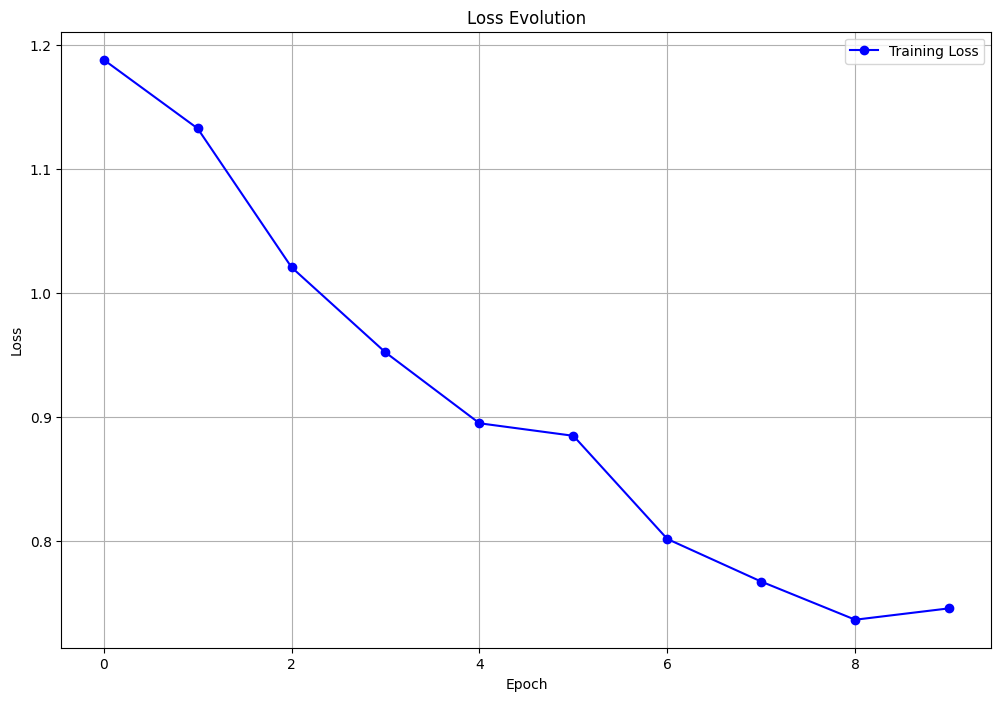

In [47]:
# Plotting the loss evolution
plt.figure(figsize=(12, 8))

plt.plot(history.history['loss'], label='Training Loss', linestyle='-', marker='o', color='b')
plt.title('Loss Evolution')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

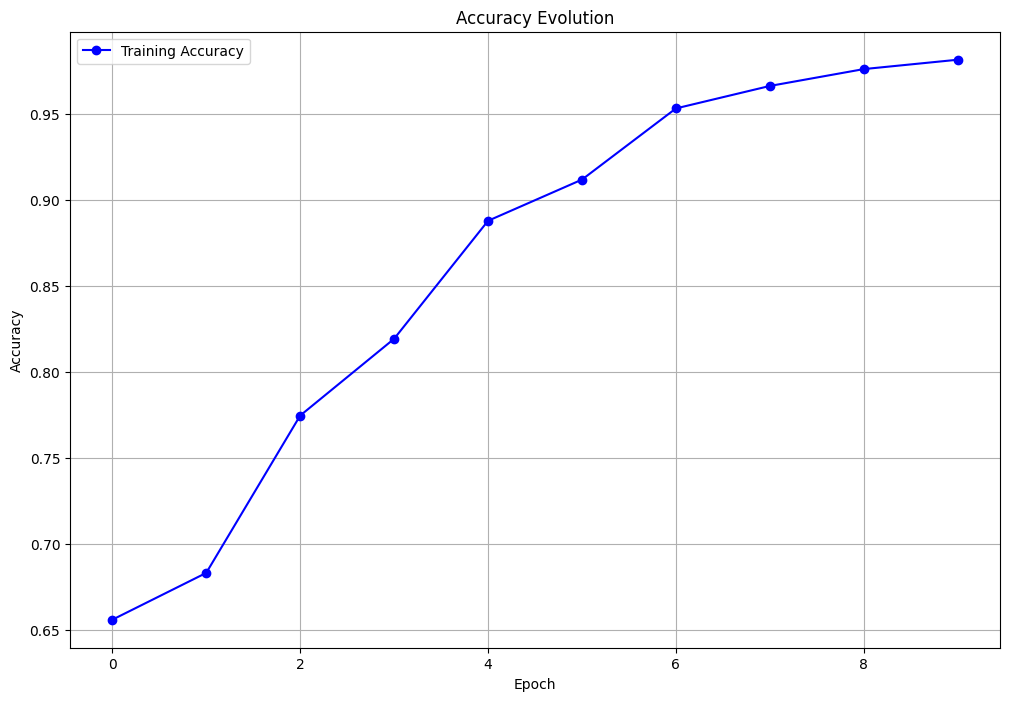

In [62]:
# Plotting the loss evolution
plt.figure(figsize=(12, 8))

plt.plot(history.history['accuracy'], label='Training Accuracy', linestyle='-', marker='o', color='b')
plt.title('Accuracy Evolution')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Plotting the Bar graph

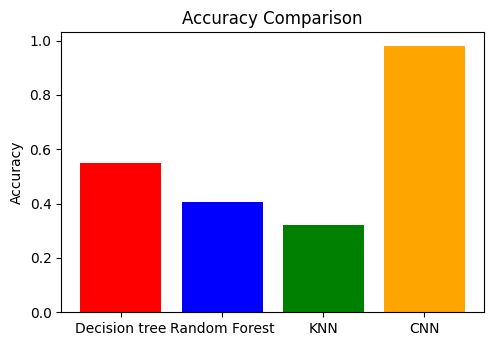

In [59]:
# Provided training accuracy
a4 = history.history['accuracy']
# Plotting the bar graph with training and test accuracies
accuracies = [ a1, a2, a3, a4[-1]]
models = ['Decision tree', 'Random Forest', 'KNN','CNN']

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.bar(models, accuracies, color=['red', 'blue', 'green', 'orange'])
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

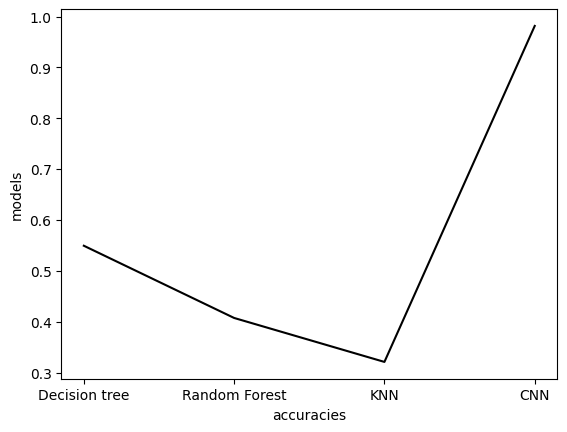

In [60]:
y=accuracies
x=models
plt.xlabel("accuracies")
plt.ylabel("models")
plt.plot(x,y,color="black")

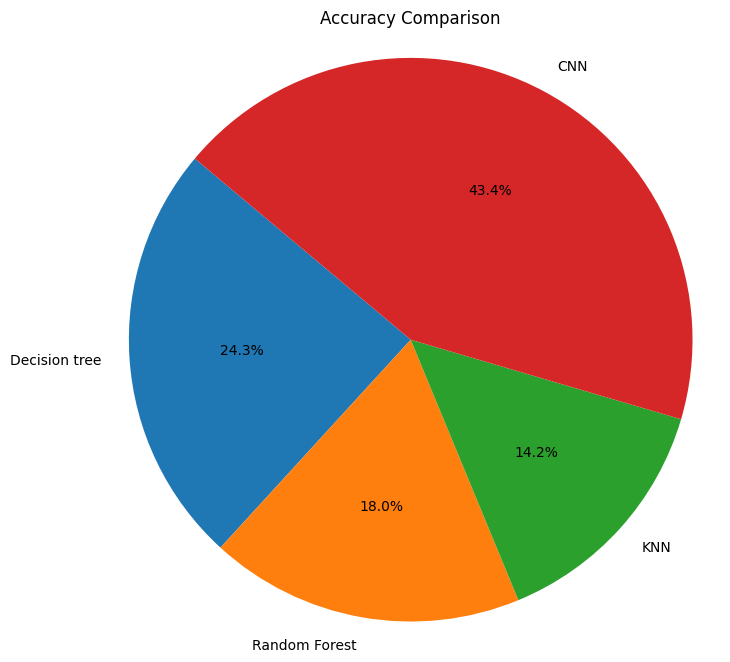

In [61]:
accuracies = [a1, a2, a3, a4[-1]]
models = ['Decision tree', 'Random Forest', 'KNN','CNN']

plt.figure(figsize=(8, 8))
plt.pie(accuracies, labels=models, autopct='%1.1f%%', startangle=140)
plt.title('Accuracy Comparison')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()